---

# Analysis on Games Review

This script describes sales pattern on an online video game store. An exploratory analysis reveals the correlation of uers and critics reviews on the sales of videogames. Further anakysis also shows th esales pattern across several platforms through a period of 36 years.


Content:
- Data Import
- Data Preprocessing
    - Changing Data types
    - Filling of Missing values
    - Addition of relevant columns
    - Filtering out non_usable entries
- Exploratory Data Analysis
    - total_sales in respective platforms
    - total_sales vs user and critic score
    - game distributionnacross genre
    - regional profile
- Statistical Data Analysis
    - testing hypothesis

- Conclusion

<div class="alert alert-success">
<b>Reviewer's comment:</b> Nice introduction!
</div>

## Step 1. Data Import

In [2]:
# Import the files
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
from numpy import mean
from numpy import std

games = pd.read_csv('/datasets/games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games['Year_of_Release'] = pd.to_numeric(games['Year_of_Release'], errors='ignore').astype(pd.Int64Dtype())
#games['Year_of_Release'] = games['Year_of_Release'].astype(int)

games['NA_sales'] = pd.to_numeric(games['NA_sales'], errors='ignore').astype(np.float32)
games['EU_sales'] = pd.to_numeric(games['EU_sales'], errors='ignore').astype(np.float32)
games['JP_sales'] = pd.to_numeric(games['JP_sales'], errors='ignore').astype(np.float32)
games['Other_sales'] = pd.to_numeric(games['Other_sales'], errors='ignore').astype(np.float32)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null Int64
Genre              16713 non-null object
NA_sales           16715 non-null float32
EU_sales           16715 non-null float32
JP_sales           16715 non-null float32
Other_sales        16715 non-null float32
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: Int64(1), float32(4), float64(1), object(5)
memory usage: 1.2+ MB


The maximum amount of entries is 16715. All columns less than that value have missing values
There are several columns with significant number of missing values:
- year_of_release    
- critic_score
- user_score
- rating

I need to investigate the missing values and know which can be filled and which should be left.

In [29]:
games.isna().sum()

name                       0
platform                   0
year_of_release            0
genre                      0
na_sales                   0
eu_sales                   0
jp_sales                   0
other_sales                0
critic_score            5347
user_score                 0
rating                     0
year_in_name               0
extract_year_in_name    8483
total_sales                0
dtype: int64

## Step 2. Data preprocessing

In [6]:
games.columns= games.columns.str.lower()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float32
eu_sales           16715 non-null float32
jp_sales           16715 non-null float32
other_sales        16715 non-null float32
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int64(1), float32(4), float64(1), object(5)
memory usage: 1.2+ MB


In [7]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='ignore')
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,NaN


- games['user_score'] was changed to numeric because the column won't be useful for the analysis as object tyoe

In [8]:
print(games.isna().sum())
print(games.isna().sum().sum())

games['year_in_name'] = games.name.fillna('none').apply(lambda x: [int(s) for s in x.split() if s.isdigit()])
def extract_year(value):
    for year in enumerate(value):
        return value[-1]

games['extract_year_in_name'] = games['year_in_name'].apply(extract_year)


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64
22318


A total of 24742 values are missing

In [9]:
games['year_of_release'] = games.groupby(['name'])['year_of_release'].apply(lambda grp:grp.fillna(grp.mode()))

games['year_of_release'] = games['year_of_release'].fillna(games.query(
    '1980 < extract_year_in_name < 2016')['extract_year_in_name'])
games['year_of_release'] = games.groupby(['platform'])['year_of_release'].apply(lambda grp:grp.fillna(grp.mode()))

print(games.isna().sum())
print(games.isna().sum().sum())

name                        2
platform                    0
year_of_release           256
genre                       2
na_sales                    0
eu_sales                    0
jp_sales                    0
other_sales                 0
critic_score             8578
user_score               6701
rating                   6766
year_in_name                0
extract_year_in_name    13679
dtype: int64
35984


games['year_of_release']. 
- Firstly, I replaced NaN values with the mode of release_year in the respective game names. This filled some cells but still left some NaNs
- Then I extracted the years that were mentioned in the name column and filled some NaNs with those values using a range of 1980 and 2016 as this were the original minimum and maximum years in the year_of_release column.
- Lastly, I replaced NaN values with the mode of release_year in the respective game platforms.

In [10]:
rating_key = games[['genre','rating']]
rating_key = rating_key.drop_duplicates(subset=['rating', 'genre'], keep='last')
rating_key = rating_key.dropna()
rating_key = rating_key.drop_duplicates(subset=['genre'])
rating_key

,genre,rating
875,Action,AO
903,Misc,K-A
6197,Platform,M
9960,Adventure,EC
10831,Simulation,M
12592,Fighting,E10+
13908,Sports,M
14270,Strategy,RP
14829,Racing,M
15738,Puzzle,T


In [11]:
rating_dict = dict(zip(rating_key.genre, rating_key.rating))
rating_dict

{'Action': 'AO',
 'Misc': 'K-A',
 'Platform': 'M',
 'Adventure': 'EC',
 'Simulation': 'M',
 'Fighting': 'E10+',
 'Sports': 'M',
 'Strategy': 'RP',
 'Racing': 'M',
 'Puzzle': 'T',
 'Role-Playing': 'E10+',
 'Shooter': 'E'}

In [12]:
games['rating'] = games['rating'].fillna(games['genre'].astype(str).map(rating_dict))
games['year_of_release'] = games['year_of_release'].fillna(0)
games['year_of_release']= pd.to_numeric(games['year_of_release'], errors='coerce').astype(np.int)
games.count()


name                    16713
platform                16715
year_of_release         16715
genre                   16713
na_sales                16715
eu_sales                16715
jp_sales                16715
other_sales             16715
critic_score             8137
user_score              10014
rating                  16713
year_in_name            16715
extract_year_in_name     3036
dtype: int64

year_of_release converted to int. float is not needed.

Some values are still missing in critic_score and user_score simply because the users and critics didn't score the games.

In [13]:
games.query('user_score == "tbd"').count()
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games['user_score'] = games['user_score'].fillna(0)

I converted user_scores containing 'tbd' to NaN equivalent

In [14]:
games['total_sales'] =  games['na_sales']  + games['eu_sales'] + games['jp_sales'] + games['other_sales']

games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_in_name,extract_year_in_name,total_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,[],NaN,82.539993
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,NaN,0.0,M,[],NaN,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,[],NaN,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,[],NaN,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,0.0,E10+,[],NaN,31.380001



<div class="alert alert-success">
<b>Reviewer's comment:</b> Good, you've provided all necessary steps!
</div>

There were 35984 cells without values. Where necessary, i filled the NaN values with the mode of the catgeory and for some I sought other methods of replacement to avoid as much NaN values as possible.

Some cells had 'tbd' which I considered and treated as NaN values.

In cases where the data type where unneccessarily large, I reduced their sizes.

---

## Step 3. Analyze the data

### Games released in different years

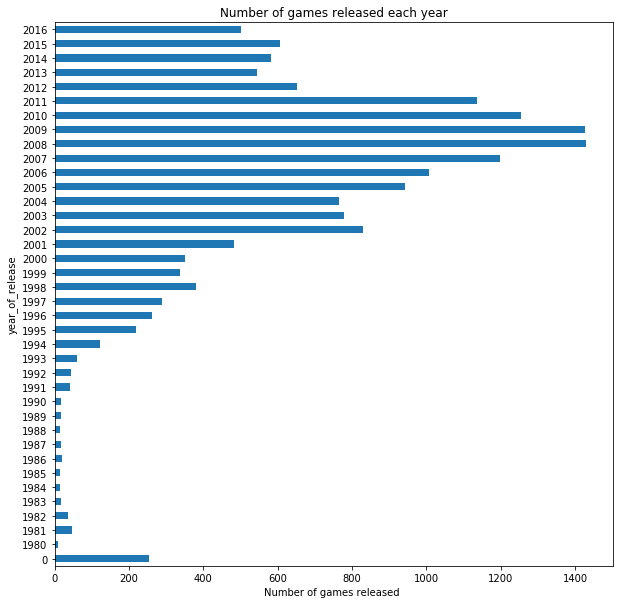

In [15]:
games.groupby('year_of_release')['name'].count().plot.barh(figsize=(10,10),
    x = 'year_of_release',  title = "Number of games released each year").set(xlabel = "Number of games released ")
plt.show()

The number of games for each period vary significantly. 
The highest number of games were released between 1998 and 2016.

### Sales variation from platform to platform 

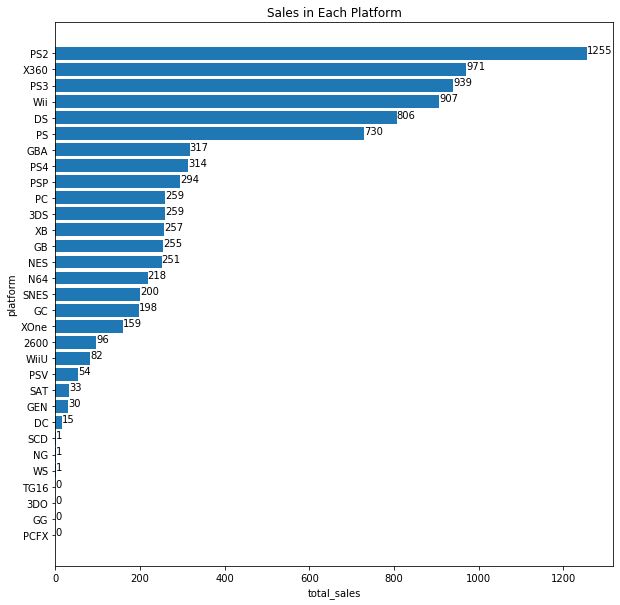

In [16]:
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values().reset_index()
x = platform_sales['platform']
y = platform_sales['total_sales'].astype('int')

plt.figure(figsize=(10, 10))

plt.barh(x,y)
plt.xlabel('total_sales')
plt.ylabel('platform')
plt.title('Sales in Each Platform')

for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.show()

<div class="alert alert-success">
<b>Reviewer's comment v2:</b> Nicely done!
</div>

Highest sales is in PS2 followed by X360, PS3 and Wii.

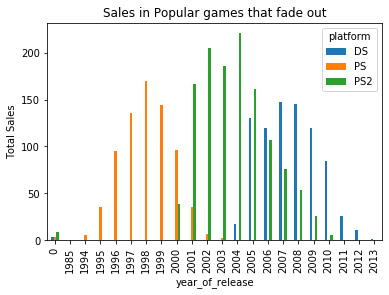

In [17]:
games.query('platform in ("PS2","DS","PS")').pivot_table(
    index = 'year_of_release',columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot.bar(
     title = "Sales in Popular games that fade out").set(ylabel = "Total Sales")

plt.show()

Refering the graph (Sales in Popular games that fade out) below,

PS, PS2 and DS used to be very popular but they have had zero sales recently.

It took 7 to 10 years before these games ran out of popularity.

Also, these games peaked within 5 years and started becoming less popular after 5 years.


There seem to be a consistent pattern for games within a period of 10 years. 
I would choose to use the data of year_of_release above 2006.

Iwould use years above 2006 because the average console loses popularity within a period of 10 years. These patterns are relevnat for analysis.

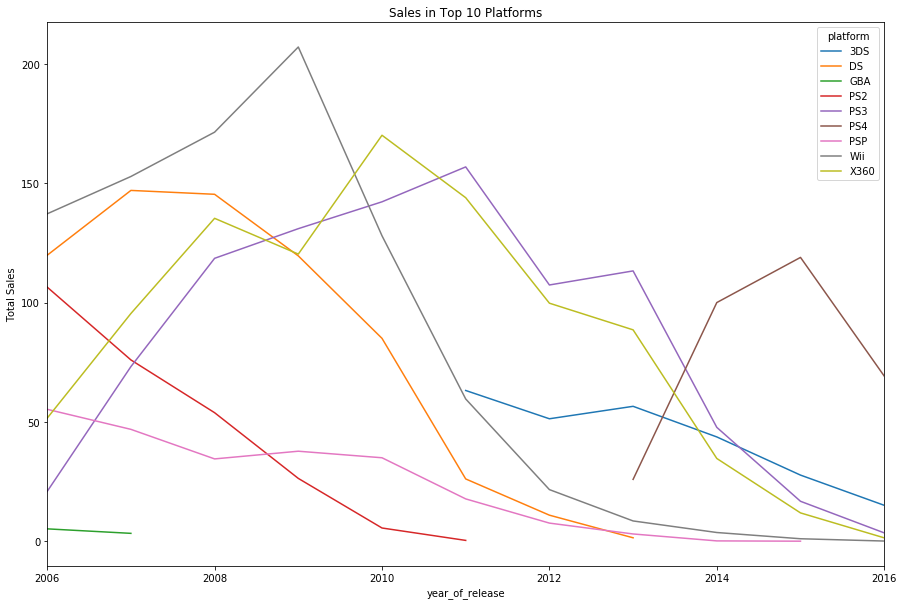

In [18]:
games = games.query("year_of_release >=  2006")

games.query('platform in ("PS2","X360","PS3","Wii","DS","PS","PS4","GBA","PSP","3DS")').pivot_table(
    index = 'year_of_release',columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(
    figsize=(15,10), title = "Sales in Top 10 Platforms").set(ylabel = "Total Sales")

plt.show()


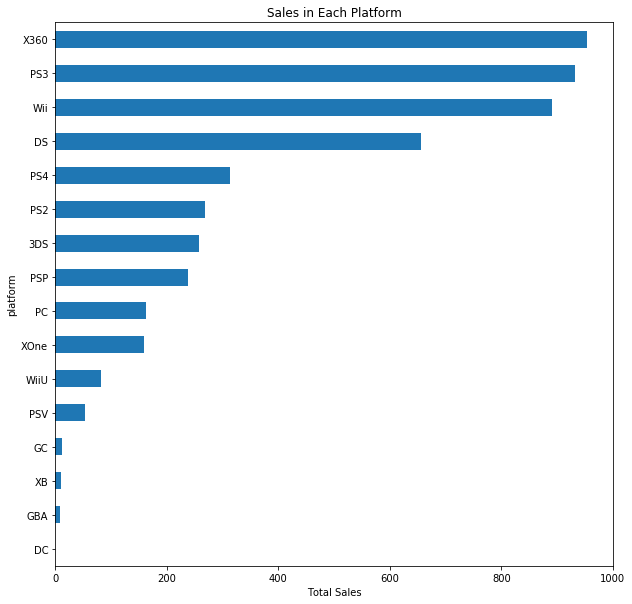

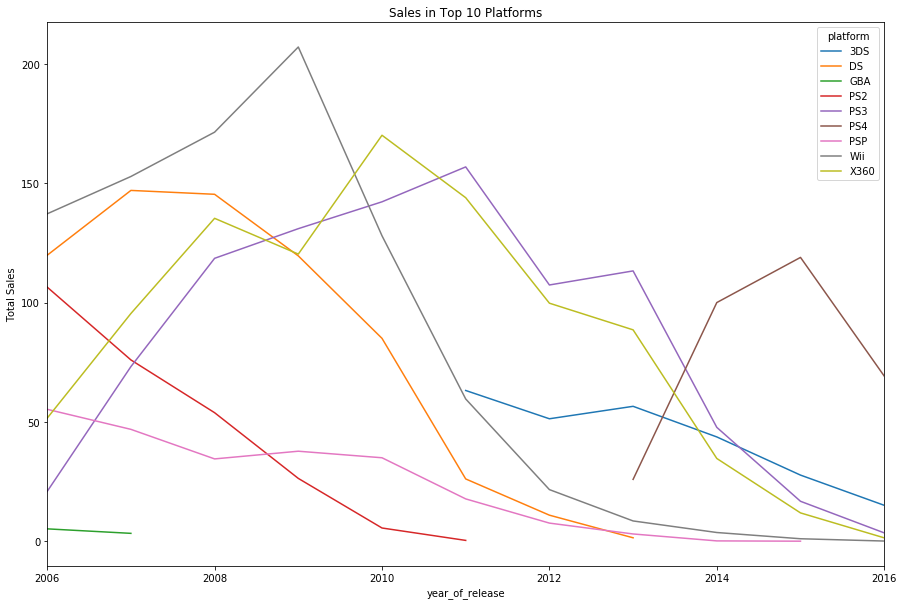

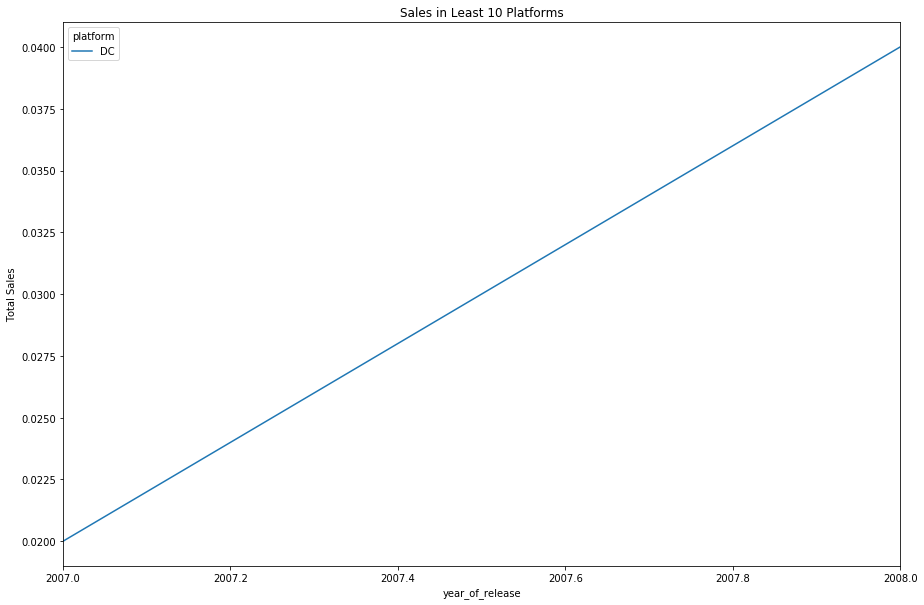

In [19]:
games = games.query("year_of_release >=  2006")

games.groupby('platform')['total_sales'].sum().sort_values().plot.barh(figsize=(10,10),
    x = 'platform',  title = "Sales in Each Platform").set(xlabel = "Total Sales")

plt.show()


games.query('platform in ("PS2","X360","PS3","Wii","DS","PS","PS4","GBA","PSP","3DS")').pivot_table(
    index = 'year_of_release',columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(
    figsize=(15,10), title = "Sales in Top 10 Platforms").set(ylabel = "Total Sales")

plt.show()

games.query('platform in ("GEN","NES","DC","SCD","NG","WS","TG16","3DO","GG","PCFX")').pivot_table(
    index = 'year_of_release',columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(
    figsize=(15,10), title = "Sales in Least 10 Platforms").set(ylabel = "Total Sales")

plt.show()

Top 10 leading platforms in sales are: "PS2","X360","PS3","Wii","DS","PS","PS4","GBA","PSP","3DS".

The data shows that no platform exhibits consistent lead through as series of consecutve years.

Each platform had their respective years of high sales.

PS4 and 3DS are the relatively new 'kids' in the block and they show a potential to be profitable in the following years.

Least 10 platforms in sales are "GEN","NES","DC","SCD","NG","WS","TG16","3DO","GG","PCFX".

NG, SCD already closed 'shop' the 90s. Only WS was sold in 2000 but it phased out.

### Global sales of all games, broken down by platform

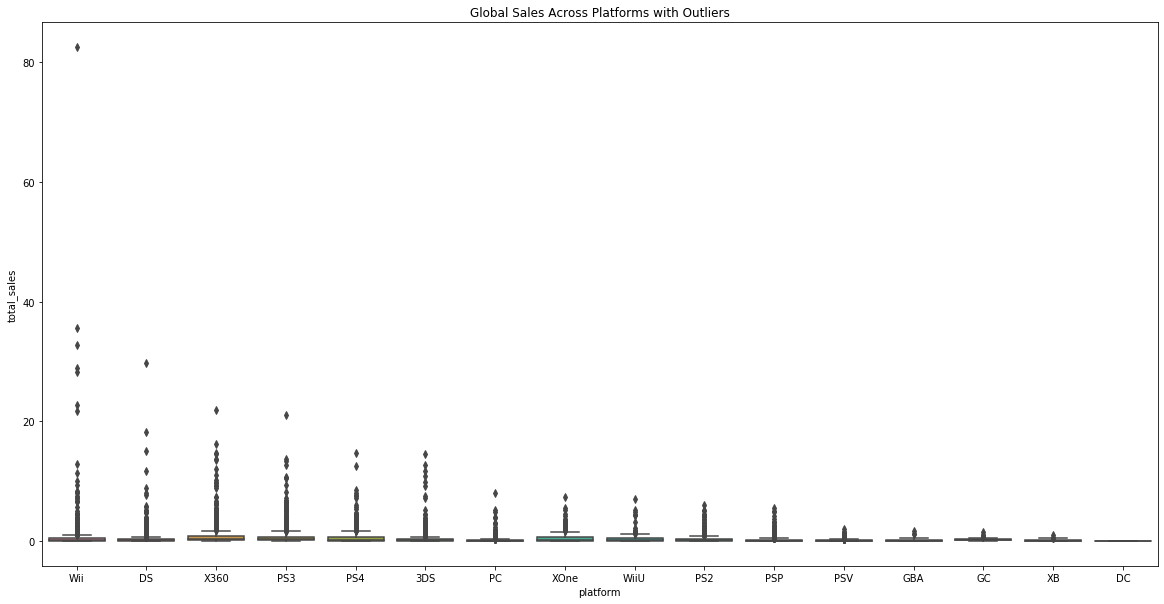

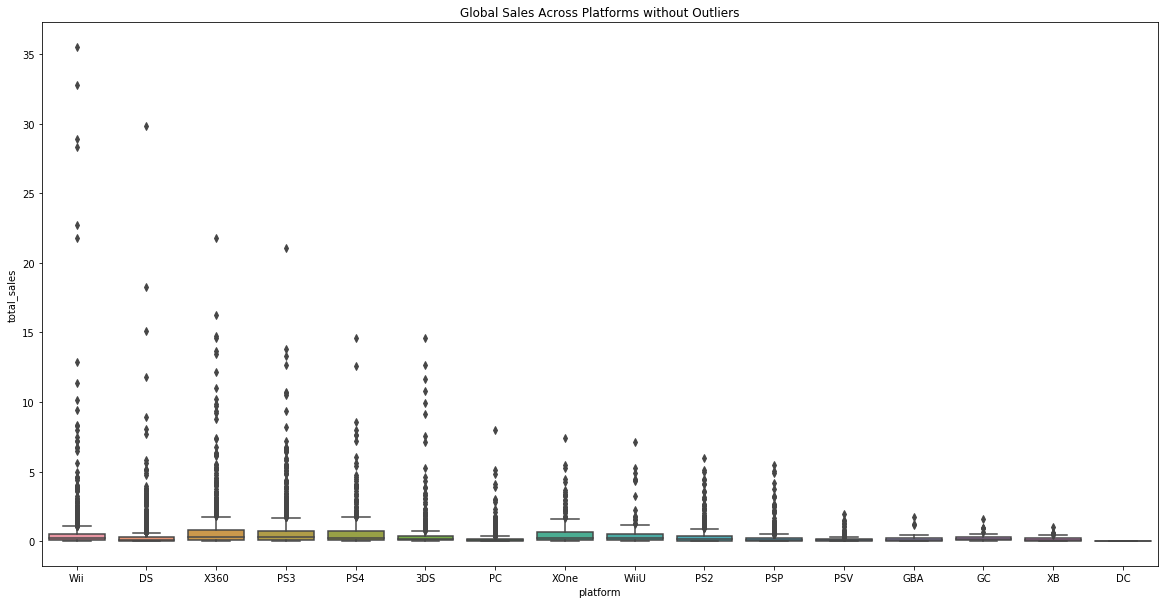

In [20]:
plt.figure(figsize=(20,10))
sns.boxplot(x="platform", y = "total_sales" ,data = games)
plt.title("Global Sales Across Platforms with Outliers")

plt.show()

plt.figure(figsize=(20,10))
sns.boxplot(x="platform", y = "total_sales" ,data = games.query('total_sales <40'))
plt.title("Global Sales Across Platforms without Outliers")

plt.show()


<div class="alert alert-success">
<b>Reviewer's comment v2:</b> 👍
</div>

The differences in sales across platforms are very significant.

The average sales on each platform vary significantly.

#### Pearsonr Correlation 

PearsonR Coeff between total_sales and critic_score:  0.39659393464408005


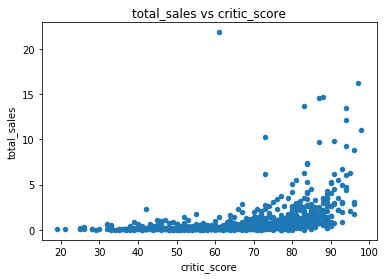

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


PearsonR Coeff between total_sales and user_score:  0.1394175040620502


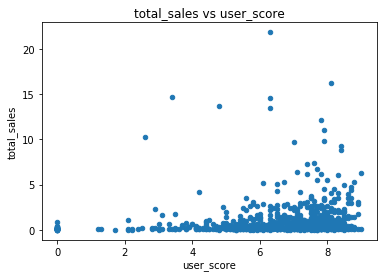

In [21]:
X360  = games.query('platform == "X360"')

X360 = X360[['total_sales','user_score','critic_score']]

X360 = X360.dropna()

X360.plot.scatter(x = 'critic_score', y = 'total_sales', title = "total_sales vs critic_score")

pearsonr_coefficient, p_value = pearsonr(
    X360['total_sales'],X360['critic_score'])
print('PearsonR Coeff between total_sales and critic_score: ', pearsonr_coefficient)


plt.show()

indexNames = X360[(X360['user_score'] == 'tbd')].index 

X360.drop(indexNames , inplace=True)


X360['user_score']  = pd.to_numeric(X360['user_score'], errors = 'coerce').astype(np.float32)
X360.plot.scatter(x = 'user_score', y = 'total_sales', title = "total_sales vs user_score")

pearsonr_coefficient, p_value = pearsonr(
    X360['total_sales'],X360['user_score'])
print('PearsonR Coeff between total_sales and user_score: ', pearsonr_coefficient)

#### Spearman Correlation

In [22]:

pd.concat([pd.DataFrame(X360[['user_score','critic_score']]),pd.DataFrame(X360['total_sales'])],axis=1).corr(method="spearman").iloc[-1]



user_score      0.335512
critic_score    0.663991
total_sales     1.000000
Name: total_sales, dtype: float64

Critic_score has a stronger correlation with total_sales compared with User_score

#### Sales in Each Genre

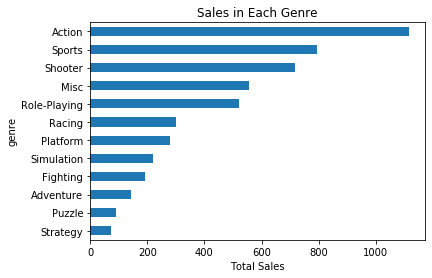

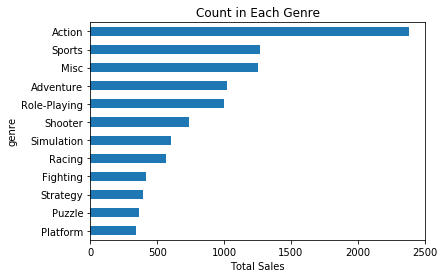

In [23]:
games

games.groupby('genre')['total_sales'].sum().sort_values().plot.barh(
    x = 'genre',  title = "Sales in Each Genre").set(xlabel = "Total Sales")

plt.show()

games.groupby('genre')['total_sales'].count().sort_values().plot.barh(
    x = 'genre',  title = "Count in Each Genre").set(xlabel = "Total Sales")

plt.show()


Top five games with highest total sales  = [Action, Sports, Shooter, Role_Playing, Misc]

Top five games with highest number of sales = [Action, Sports, Misc, Role_Playing, Adventure]

Strategy and Puzzle are the least sold games and also least total_sales. 

There is a rnage of period when sales on a platfrm become popular and then the popularirty declines. The range is usually less than 10 years. Generally, critic scores plays a critical role in sales of games more than user scores.


## Step 4. Create a user profile for each region


In [24]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_in_name,extract_year_in_name,total_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,[],NaN,82.539993
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,[],NaN,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,[],NaN,32.770000
6,New Super Mario Bros.,DS,2006,Platform,11.280000,9.140000,6.50,2.88,89.0,8.5,E,[],NaN,29.799999
7,Wii Play,Wii,2006,Misc,13.960000,9.180000,2.93,2.84,58.0,6.6,E,[],NaN,28.910000


####  Top five platforms' sales in each region

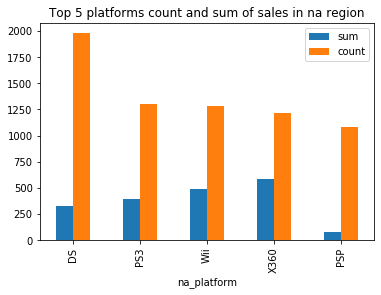

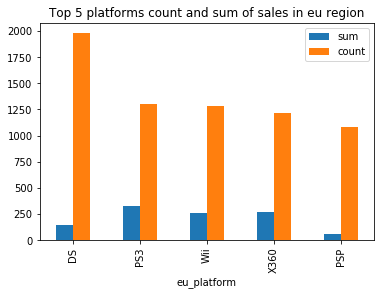

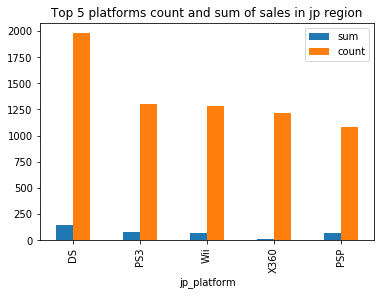

In [25]:
na = games.groupby('platform').agg({'na_sales':['sum','count']}).reset_index()
na.columns = ['na_platform','sum','count']
na.sort_values(by = 'count',ascending=False, inplace = True)
na.head().plot.bar(x = 'na_platform', title = 'Top 5 platforms count and sum of sales in na region' )

plt.show()
eu = games.groupby('platform').agg({'eu_sales':['sum','count']}).reset_index()
eu.columns = ['eu_platform','sum','count']
eu.sort_values(by = 'count',ascending=False, inplace = True)
plt.show()
eu.head().plot.bar(x = 'eu_platform', title = 'Top 5 platforms count and sum of sales in eu region' )

plt.show()

jp = games.groupby('platform').agg({'jp_sales':['sum','count']}).reset_index()
jp.columns = ['jp_platform','sum','count']
jp.sort_values(by = 'count',ascending=False, inplace = True)
plt.show()
jp.head().plot.bar(x = 'jp_platform', title = 'Top 5 platforms count and sum of sales in jp region' )


The Number of sales in the top 5 platforms across the three regions are very proportionate. 
PS2 ranks the highest in the three regions followed by DS, PS3, Wii and X360.

The sales in the regions however differ.

####  ESRB ratings and sales in each region

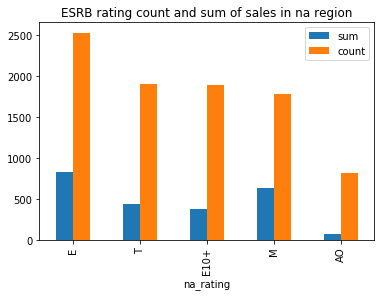

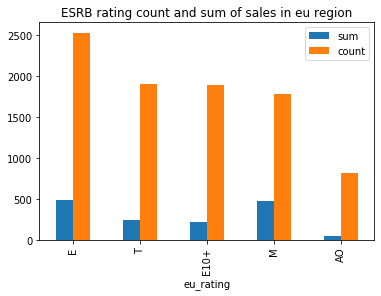

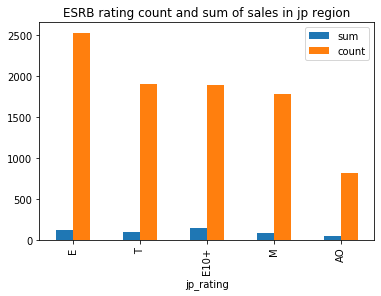

In [26]:
na_esrb= games[['rating','na_sales']].groupby('rating').agg({'na_sales':['sum','count']}).reset_index()
na_esrb.columns = ['na_rating','sum','count']
na_esrb.sort_values(by = 'count',ascending=False, inplace = True)
na_esrb.head().plot.bar(x = 'na_rating', title = 'ESRB rating count and sum of sales in na region' )


eu_esrb= games[['rating','eu_sales']].groupby('rating').agg({'eu_sales':['sum','count']}).reset_index()
eu_esrb.columns = ['eu_rating','sum','count']
eu_esrb.sort_values(by = 'count',ascending=False, inplace = True)
eu_esrb.head().plot.bar(x = 'eu_rating', title = 'ESRB rating count and sum of sales in eu region' )


jp_esrb= games[['rating','jp_sales']].groupby('rating').agg({'jp_sales':['sum','count']}).reset_index()
jp_esrb.columns = ['jp_rating','sum','count']
jp_esrb.sort_values(by = 'count',ascending=False, inplace = True)
jp_esrb.head().plot.bar(x = 'jp_rating', title = 'ESRB rating count and sum of sales in jp region' )

plt.show()


With the exception of jp,the sum of sales in eu and na regions is highly proportinate to the esrb rating.

Simliarly, the number sales across all regions corresponds to the esrb rating.

One can establish that esrb rating affect sales.

<div class="alert alert-success">
<b>Reviewer's comment:</b> Nice sub-research! Thank you.
</div>

## Step 5. Test the following hypotheses:

#### Average user ratings of the Xbox One and PC platforms are the same.

1. Alternative Hypothesis --> $H_{A}$ : Average user ratings of the Xbox One and PC platforms are the same. 

                                $μ_{X360}$ == $μ_{PC}$ 


   Null Hypothesis -->       $H_{0}$: Average user ratings of the Xbox One and PC platforms are NOT the same. 
                                 
                                $μ_{X360}$ != $μ_{PC}$ 
   

<div class="alert alert-success">
<b>Reviewer's comment:</b> 👍
</div>

In [27]:
X360_rating = X360['user_score']

PC  = games.query('platform == "PC"')

PC = PC[['total_sales','user_score','critic_score']]

PC = PC.dropna()


indexNames2 = PC[(PC['user_score'] == 'tbd')].index 

PC.drop(indexNames2 , inplace=True)


PC['user_score']  = pd.to_numeric(PC['user_score'], errors = 'coerce').astype(np.float32)


PC_rating  = PC['user_score']



alpha = 0.05

results = st.ttest_ind(
        X360_rating, 
        PC_rating)

print('p-value: ', results.pvalue)

if (results.pvalue <= alpha):
        print("We reject the null hypothesis. Therefore, average rating for PC and x360 are same.")
else:
        print("We can't reject the null hypothesis. Therefore, average rating for PC and x360 differ.")

p-value:  0.038685752429886366
We reject the null hypothesis. Therefore, average rating for PC and x360 are same.


#### Average user ratings for the Action and Sports genres are different. 

2. Alternative Hypothesis --> $H_{A}$ : Average user ratings for the Action and Sports genres are different. 

                                $μ_{Action}$ != $μ_{Sports}$ 


   Null Hypothesis -->       $H_{0}$: Average user ratings for the Action and Sports genres are NOT different. 
                                 
                                $μ_{Action}$ == $μ_{Sports}$ 

In [28]:
Action  = games.query('genre == "Action"')

Action = Action[['total_sales','user_score','critic_score']]

Action = Action.dropna()


indexNames3 = Action[(Action['user_score'] == 'tbd')].index 

Action.drop(indexNames3 , inplace=True)


Action['user_score']  = pd.to_numeric(Action['user_score'], errors = 'coerce').astype(np.float32)


Sports  = games.query('genre == "Sports"')

Sports = Sports[['total_sales','user_score','critic_score']]

Sports = Sports.dropna()


indexNames3 = Sports[(Sports['user_score'] == 'tbd')].index 

Sports.drop(indexNames3 , inplace=True)


Sports['user_score']  = pd.to_numeric(Sports['user_score'], errors = 'coerce').astype(np.float32)


Action_rating = Action['user_score']
Sports_rating  = Sports['user_score']



alpha = 0.05

results = st.ttest_ind(
        Action_rating, 
        Sports_rating)

print('p-value: ', results.pvalue)

if (results.pvalue <= alpha):
        print("We reject the null hypothesis. Therefore, average rating in actions and sports differ.")
else:
        print("We can't reject the null hypothesis. Therefore, average rating in actions and sports are same.")


p-value:  8.510109792471213e-08
We reject the null hypothesis. Therefore, average rating in actions and sports differ.


<div class="alert alert-success">
<b>Reviewer's comment:</b> Well done, both tests are right.
</div>

While the  average rating for some games such as PC and x360 are same, the average rating for some games also differ. e.g. sports and action.

## Step 6. Write a general conclusion


The original data which contained over 22,000 missing values was preprocessed by filling the values with modes and other medthods of replacement to enrich the data. Cells containing 'tbd' were treated as NaN cell equivalents.

Analysis of the processd data showed PS2 followed by X360, PS3 and Wi as the highest game selling platforms while TD16, 3DO, GG and PCFX were the least game selling platform for all time.

A deeper dive into the data showed form 2006 onwards, X360, PS3 and Wi remained the highest gma eselling platforms 
The analysis reveals that games in different platforms reign for specific periods. Sales increaes and then declines usually under a period of 10 years, even for very popular games. 
With resopect to genres action and sports are the most popular games and sold games.

Also, the trend on sales is very similar across different regions for na, jp and eu. Asides jp, the sum of sales in eu and na regions is highly proportinate to the esrb rating.

Overall, critic scores and user scores have influence on the sales games. However, scritic scores have more influence.